<a href="https://colab.research.google.com/github/FerdousJUST/InceptionV3-model-implementation-for-Fish-Image-Classification-/blob/main/InceptionV3_fish_image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [42]:
import os
import shutil
import glob

In [43]:
TRAIN_DIR = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 "
ORG_DIR = " /content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training"
CLASS = ['Barbel_fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia Fish']

In [34]:
for c in CLASS: 
  DEST = os.path.join(TRAIN_DIR,c)
  if not os.path.exists(DEST):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR,c)+ " * "):
    SRC = img_path
    shutil.copy(SRC,DEST)

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense,Flatten
from keras.models import Model  
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

In [45]:
base_model = InceptionV3(input_shape = (256,256,3),include_top= False)

In [46]:
for layer in base_model.layers:
  layer.trainable = False

In [61]:
x = Flatten()(base_model.output)
x = Dense(units = 4, activation = 'softmax')(x)

model = Model(base_model.input,x)
#model.compile(optimizer = 'adam',loss= 'sparse_categorical_crossentropy ',metrics = ['accuracy'])
model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy,metrics = ['accuracy'])


In [62]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 127, 127, 32  96         ['conv2d_376[0][0]']             
 Normalization)                 )                                                           

In [63]:
train_datagen = ImageDataGenerator(featurewise_center= True,
                                   rotation_range = 0.4,
                                   width_shift_range=0.3,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input,
                                   zoom_range = 0.4,
                                   shear_range = 0.4 )
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size = (256,256),
                                               batch_size = 36)

Found 4800 images belonging to 4 classes.


In [64]:
train_data.class_indices

{'Barbel_Fish': 0,
 'Hilsha_Fish': 1,
 'Spotted_Snakehead_Fish': 2,
 'Tilapia_Fish': 3}

In [65]:
t_img,label = train_data.next()


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [52]:
t_img

array([[[[-0.26013875, -0.3488356 , -0.4147311 ],
         [-0.3141222 , -0.40371597, -0.4725657 ],
         [-0.33456028, -0.421629  , -0.49466676],
         ...,
         [-0.53214985, -0.57302   , -0.56422997],
         [-0.54904383, -0.5446715 , -0.5498779 ],
         [-0.538699  , -0.53593624, -0.5383468 ]],

        [[-0.5910194 , -0.7614244 , -0.7909939 ],
         [-0.6345019 , -0.8051037 , -0.8372584 ],
         [-0.6705442 , -0.8404389 , -0.877288  ],
         ...,
         [-0.70660233, -0.7441369 , -0.7241006 ],
         [-0.71957326, -0.7599405 , -0.74666786],
         [-0.71656674, -0.75787616, -0.7443445 ]],

        [[-0.62343705, -0.7856154 , -0.7830146 ],
         [-0.6425454 , -0.80403006, -0.80195093],
         [-0.65683067, -0.8142645 , -0.8131341 ],
         ...,
         [-0.73354524, -0.76503146, -0.7534927 ],
         [-0.7920864 , -0.86441064, -0.8358974 ],
         [-0.78264916, -0.8532618 , -0.82788646]],

        ...,

        [[ 1.        ,  1.        ,  1

In [53]:
t_img.shape

(36, 256, 256, 3)

In [54]:
def plotImages (img_arr,label):
  for idx,img in enumerate(img_arr):
    if idx <= 10:
      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()


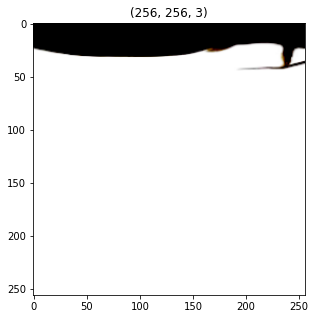

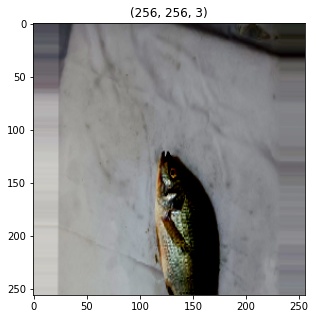

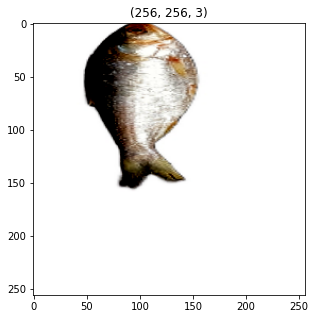

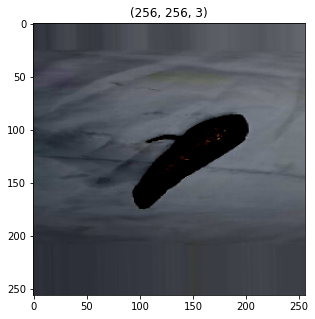

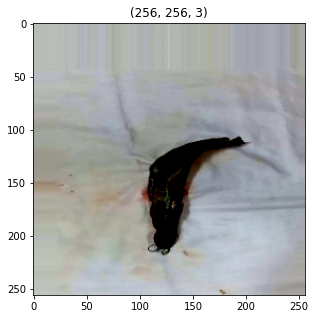

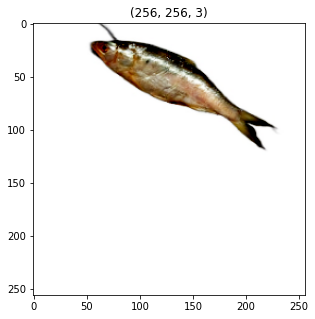

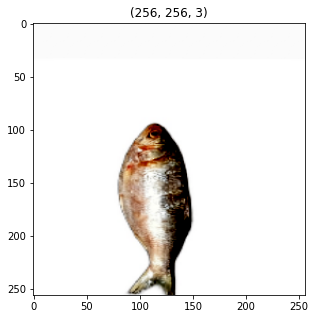

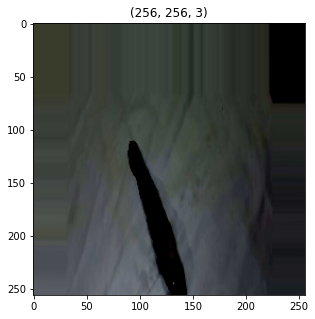

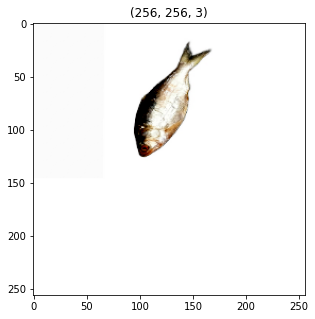

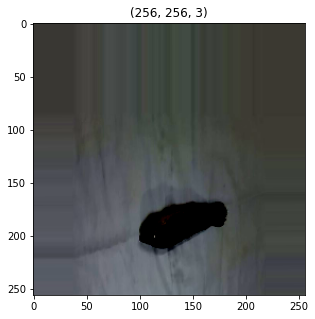

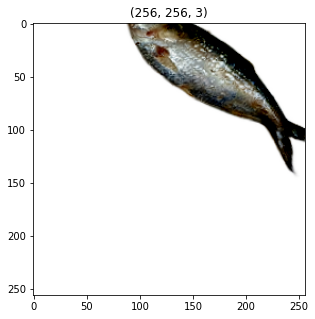

In [55]:
plotImages(t_img,label)

In [66]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc = ModelCheckpoint(filepath = " /content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part eleven/inception_model.h5",
                      monitor = " accuracy",
                      varbose = 1,
                      save_best_only = True)

es = EarlyStopping(monitor = "accuracy",
                   min_delta = 0.01,
                   patience=3,
                   verbose = 1)
cb = [mc,es]

In [68]:
from keras import callbacks
his = model.fit_generator(train_data,
                          steps_per_epoch = 10,
                          epochs = 10,
                          callbacks = cb
                          )

<ipython-input-68-6ebe036767e1>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data,


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.5617 - accuracy: 0.8917 

10/10 [==============================] - 142s 14s/step - loss: 0.5617 - accuracy: 0.8917
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.2766 - accuracy: 0.9083 

10/10 [==============================] - 131s 12s/step - loss: 0.2766 - accuracy: 0.9083
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.9556 

10/10 [==============================] - 113s 11s/step - loss: 0.1499 - accuracy: 0.9556
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.1444 - accuracy: 0.9667 

10/10 [==============================] - 124s 12s/step - loss: 0.1444 - accuracy: 0.9667
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.1051 - accuracy: 0.9694

10/10 [==============================] - 103s 10s/step - loss: 0.1051 - accuracy: 0.9694
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9528

10/10 [==============================] - 98s 9s/step - loss: 0.1300 - accuracy: 0.9528
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.0856 - accuracy: 0.9694

10/10 [==============================] - 94s 9s/step - loss: 0.0856 - accuracy: 0.9694
Epoch 7: early stopping


In [70]:
from keras.models import load_model
model = load_model(" /content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part eleven/inception_model.h5")

OSError: ignored

In [71]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy'])

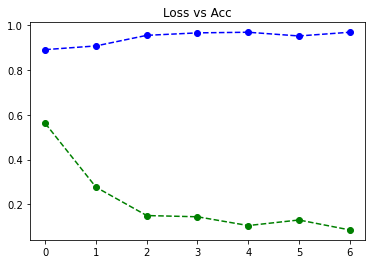

In [72]:
plt.plot(h['loss'],'go--',c="green")
plt.plot(h['accuracy'],'go--',c="blue")
plt.title("Loss vs Acc")
plt.show()

In [78]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/barbel1.jpg"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
else:
  print("Hilsha Fish")


  plt.imshow(input_arr[0])
  plt.title("input image")
  plt.show()

1/1 [==============================] - 0s 180ms/step
Barbel Fish


1/1 [==============================] - 0s 182ms/step


Hilsha Fish


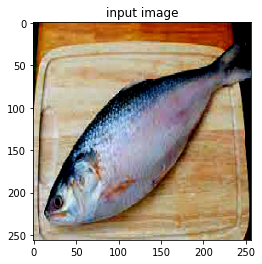

In [79]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/hilsha1.jpg"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
else:
  print("Hilsha Fish")


  plt.imshow(input_arr[0])
  plt.title("input image")
  plt.show()